## OUTLINE: 

In this ML project, we are implementing 3 different modelels: KNN for imputing categorical data, Lasso regression for imputing numerical data and DT for classifying if a person has a heart disease or not 

1. Reading the files
2. Missing Values
3. Imputing categorical variables using KNN
4. Imputing numerical variables using Lasso regressor
5. Classification with Decision Tree using single split
6. Classification with Decision Tree using Cross validation
7. Interpretation of the results

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [52]:
#importing necessary assigments:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

We are using 2 different datasets (containing the same columns) that will be our training and testing set. The whole training set will be splitted in training and validation. This is a reduced version of the original dataset, which contains more columns. In this case, we are only using the features that are mention below.

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the 'heart-disease.names' file in this folder.

The target variable that we are  trying to predict here is 'num':
'num' is the diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing \
(in any major vessel: attributes 59 through 68 are vessels)

   -- Only 14 features used:
   
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num) 

In [53]:


#first we set the column names creating a list of strings. Then we load the dataset
columns = np.array(['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'num'])
cleveland = pd.read_csv('cleveland.data', header = None) 
test = pd.read_csv('switzerland.data', header = None)      
### now we put the column names for both df:
cleveland.columns = columns
test.columns = columns
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [54]:
#checking basic stats for the cleveland dataset:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [55]:
# checking basic stats for the test dataset
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

This datasets contain a lot of missing values, not only encoded as NaN but using different symbols and characters. After an exhausting search and keeping in mind the definition of each variable, the following missing values were detected: 

C:\Users\nico-\AppData\Local\Temp\ipykernel_15432\3943275719.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleveland['age'].replace([0, 999], np.nan, inplace = True)
C:\Users\nico-\AppData\Local\Temp\ipykernel_15432\3943275719.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

<function matplotlib.pyplot.show(close=None, block=None)>

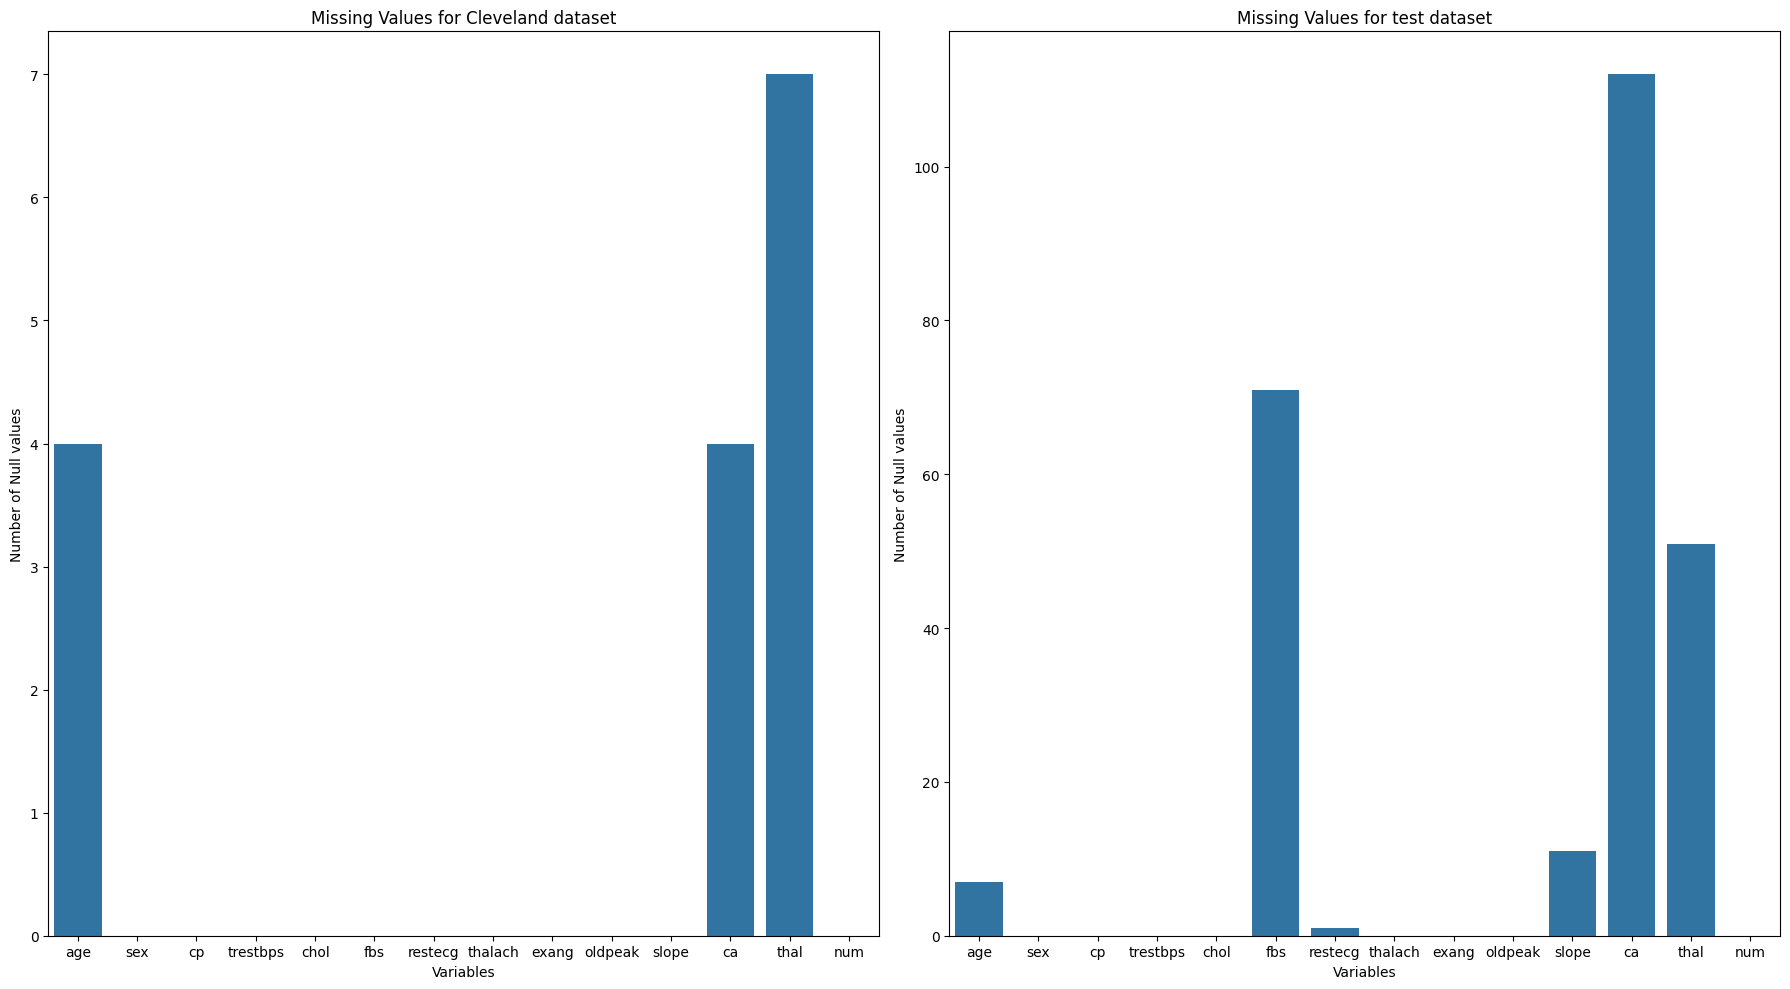

In [56]:
#we drop the following rows in test because they have all missing values for every column 
test.dropna(subset = ['num'], inplace = True)
test.reset_index(drop = True, inplace = True)
###for test[chol] we have 0, which will be treated as NaN
# for test[age] and cleveland[age] we have values of 0 and 999, which will be considered as NaN.
cleveland['age'].replace([0, 999], np.nan, inplace = True)
test['age'].replace([0, 999], np.nan, inplace = True)


##then we change the missing values encoded as '?' with NaN for all the dataframes:
cleveland.replace(['?','!'], np.nan, inplace=True)
test.replace(['?','!'], np.nan, inplace = True)

#then we calculate amount of NaN:
cleveland_na = cleveland.isnull().sum()
test_na = test.isnull().sum()
#then we create the subplots:
fig, axes = plt.subplots(1,2, figsize = (18,10))

sns.barplot(x = cleveland_na.index, y = cleveland_na.values, ax = axes[0])
axes[0].set_title('Missing Values for Cleveland dataset')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Number of Null values')

sns.barplot(x = test_na.index, y = test_na.values, ax = axes[1])
axes[1].set_title('Missing Values for test dataset')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Number of Null values')

plt.tight_layout()
plt.show

Now all the missing values are encoded as NaN: 

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       110 non-null    float64
 1   sex       117 non-null    float64
 2   cp        117 non-null    float64
 3   trestbps  117 non-null    float64
 4   chol      117 non-null    float64
 5   fbs       46 non-null     object 
 6   restecg   116 non-null    object 
 7   thalach   117 non-null    float64
 8   exang     117 non-null    float64
 9   oldpeak   117 non-null    float64
 10  slope     106 non-null    object 
 11  ca        5 non-null      object 
 12  thal      66 non-null     object 
 13  num       117 non-null    float64
dtypes: float64(9), object(5)
memory usage: 12.9+ KB


In [58]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      296 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## *3.* Imputing categorical variables

First we are separating the dataset into categorical and numerical columns, in order to apply different methods of imputation

In [59]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'num' ]       
numerical_columns =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']    
#converting the types:
cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')
test[categorical_columns] = test[categorical_columns].astype('object')

# Convert numerical columns to numeric type
cleveland[numerical_columns] = cleveland[numerical_columns].apply(pd.to_numeric)
test[numerical_columns] = test[numerical_columns].apply(pd.to_numeric)
# Display the DataFrame to confirm the changes
print(cleveland.dtypes)
print(test.dtypes)

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object
age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object


### Splitting the cleveland dataframe in a train and a validation set.

The train set  is called train and the validation set is defined as val. The size of the validation set must be 30% of the total size of the cleveland dataframe. In this case, we are using shuffle=True and stratify=True.

In [60]:

X_cleveland = cleveland.drop('num', axis = 1)  
y_cleveland = cleveland['num']  
X_test = test.drop('num', axis = 1)    
y_test = test['num']       

In [61]:
from sklearn.model_selection import train_test_split
# I use random_State = 8 as stated at the begining of the notebook.
X_train, X_val, y_train, y_val = train_test_split(X_cleveland, y_cleveland, test_size = 0.3, stratify = y_cleveland, shuffle = True, random_state = 8 )

In [62]:
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0
222,39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
114,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0
276,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0
265,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0


In [63]:
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
158,NaN,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0
15,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0
244,60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0
194,68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0


In [64]:
# To make the classification task easier, we are transforming the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.
#we use lambda function for this part:
y_train = y_train.apply(lambda x: 0 if x == 0 else 1)
y_val = y_val.apply(lambda x: 0 if x == 0 else 1)
y_test = y_test.apply(lambda x: 0 if x == 0 else 1)
print(y_train.unique())
print(y_val.unique())
print(y_test.unique())

[1 0]
[1 0]
[1 0]


### Imputing the missing values in the categorical columns. In this case, we are using KNNImputer from sklearn for the imputation process.

In [65]:


from sklearn.impute import KNNImputer


#we need to exclude 'num' from  the original array 'categorical_columns' because its not in the train set.
cat_col = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal'] 
train_cat = X_train[cat_col]
#the same for validation:
val_cat = X_val[cat_col]
#we append 'num' column here as y_test
test_cat = X_test[cat_col]

#FOR TRAINING:
knn_imputer = KNNImputer(n_neighbors= 5, weights = 'distance' )
train_imputed = knn_imputer.fit_transform(train_cat)
train_imputed_knn = pd.DataFrame(train_imputed, columns = cat_col, index = train_cat.index)
# 'thal' and 'ca' present different values from the originals. We aprroximate them to the nearest value:
ca_labels = np.array([0,1,2,3])
thal_labels = np.array([3,6,7])
def roundca(x):
    return ca_labels[np.argmin(np.abs(ca_labels - x))]
def roundthal(x):
    return thal_labels[np.argmin(np.abs(thal_labels - x))]
train_imputed_knn['ca'] = train_imputed_knn['ca'].apply(roundca)
train_imputed_knn['thal'] = train_imputed_knn['thal'].apply(roundthal)

#FOR VALIDATION:
val_imputed = knn_imputer.fit_transform(val_cat)
val_imputed_knn = pd.DataFrame(val_imputed, columns = cat_col, index = val_cat.index)
#in this case, onlu 'ca' presetend different values
val_imputed_knn['ca'] = train_imputed_knn['ca'].apply(roundca)
#FOR TEST:
test_imputed = knn_imputer.fit_transform(test_cat)
test_imputed_knn = pd.DataFrame(test_imputed, columns = cat_col, index = test_cat.index)
# in this case 'sex', 'cp', 'fbs, 'restecg', 'exang', 'slope', 'ca' and 'thal' (all of variables), present different imputed values
sex_labels = np.array([0,1])
cp_labels = np.array([1,2,3,4])
restecg_labels = np.array([0,1,2])
exang_labels = np.array([0,1])
slope_labels = np.array([1,2,3])
fbs_labels = np.array([0,1])
def roundsex(x):
    return sex_labels[np.argmin(np.abs(sex_labels - x))]
def roundcp(x):
    return cp_labels[np.argmin(np.abs(cp_labels - x))]
def roundrestecg(x):
    return restecg_labels[np.argmin(np.abs(restecg_labels - x))]
def roundexang(x):
    return exang_labels[np.argmin(np.abs(exang_labels - x))]
def roundslope(x):
    return slope_labels[np.argmin(np.abs(slope_labels - x))]
def roundfbs(x):
    return fbs_labels[np.argmin(np.abs(fbs_labels - x))]

test_imputed_knn['sex'] = test_imputed_knn['sex'].apply(roundsex)
test_imputed_knn['cp'] = test_imputed_knn['cp'].apply(roundcp)
test_imputed_knn['fbs'] = test_imputed_knn['fbs'].apply(roundfbs)
test_imputed_knn['restecg'] = test_imputed_knn['restecg'].apply(roundrestecg)
test_imputed_knn['exang'] = test_imputed_knn['exang'].apply(roundexang)
test_imputed_knn['slope'] = test_imputed_knn['slope'].apply(roundslope)
test_imputed_knn['ca'] = test_imputed_knn['ca'].apply(roundca)
test_imputed_knn['thal'] = test_imputed_knn['thal'].apply(roundthal)



## *4.* Imputing numerical variables

### Imputing the missing values in the numerical columns using a Lasso Regression from sklearn for the imputation process


We are excluding the columns with missing values when fitting the regressor: we are only train on columns without missing values. After a column has been imputed, it will be used to fit the regressor in the next step. In this case, the only numerical column presenting missing values is age. 

In [66]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#We create a subset of the train dataset with only the numerical columns
numerical_columns =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']   

train_num = X_train[numerical_columns]
# then we create a subset of the val dataset with only the numerical columns
val_num = X_val[numerical_columns]
# we create a subset of the test dataset with only the numerical columns
test_num = X_test[numerical_columns] 

#fro training
train_num_missing = train_num[['age']]
train_num_not_missing = train_num[['oldpeak', 'trestbps', 'chol', 'thalach']]
#for validation
val_num_missing = val_num[['age']]
val_num_not_missing = val_num[['oldpeak', 'trestbps', 'chol', 'thalach']]
#for test
test_num_missing = test_num[['age']]
test_num_not_missing = test_num[['oldpeak', 'trestbps', 'chol', 'thalach']]

#then we create the regressor:
lasso = Lasso(alpha = 0.1)
####FOR TRAINING: 
v_train = train_num[~train_num_missing['age'].isna()]
v_train_i = train_num[train_num_missing['age'].isna()]
#cols with NAN
v_train_nan = v_train[['age']]
v_train_non_nan= v_train[['oldpeak', 'trestbps', 'chol', 'thalach']]
#fitting the regressor:
lasso.fit(v_train_non_nan, v_train_nan)
#predicting:
final_v_train_nan = v_train_i[['age']]
final_v_train_non_nan = v_train_i[['oldpeak', 'trestbps', 'chol', 'thalach']]
train_num_imputed_lasso = pd.DataFrame(lasso.predict(final_v_train_non_nan), columns = ['age'], index = final_v_train_nan.index)
v_train_i['age'] = train_num_imputed_lasso['age']
#now we concatenate to get final df for training
train_imputed_lasso = pd.concat([v_train, v_train_i] , axis = 0)
# matching index:
train_imputed_lasso = train_imputed_lasso.loc[train_num.index]

####FOR VALIDATION
v_val = train_num[~train_num_missing['age'].isna()]
v_val_i = val_num[val_num_missing['age'].isna()]
val_num_not_missing = val_num[~val_num_missing['age'].isna()]
#cols with NAN
v_val_nan = v_val[['age']]
v_val_non_nan= v_val[['oldpeak', 'trestbps', 'chol', 'thalach']]
#fitting the regressor:
lasso.fit(v_val_non_nan, v_val_nan)
#predicting:
final_v_val_nan = v_val_i[['age']]
final_v_val_non_nan = v_val_i[['oldpeak', 'trestbps', 'chol', 'thalach']]
val_num_imputed_lasso = pd.DataFrame(lasso.predict(final_v_val_non_nan), columns = ['age'], index = final_v_val_nan.index)
v_val_i['age'] = val_num_imputed_lasso['age']
#now we concatenate to get final df for training
val_imputed_lasso = pd.concat([val_num_not_missing, v_val_i] , axis = 0)
#matching the order
val_imputed_lasso = val_imputed_lasso.loc[val_num.index]

####FOR TEST
v_test = train_num[~train_num_missing['age'].isna()]
v_test_i = test_num[test_num_missing['age'].isna()]
test_num_not_missing = test_num[~test_num_missing['age'].isna()]
#cols with NAN
v_test_nan = v_test[['age']]
v_test_non_nan= v_test[['oldpeak', 'trestbps', 'chol', 'thalach']]
#fitting the regressor:
lasso.fit(v_test_non_nan, v_test_nan)
#predicting:
final_v_test_nan = v_test_i[['age']]
final_v_test_non_nan = v_test_i[['oldpeak', 'trestbps', 'chol', 'thalach']]
test_num_imputed_lasso = pd.DataFrame(lasso.predict(final_v_test_non_nan), columns = ['age'], index = final_v_test_nan.index)
v_test_i['age'] = test_num_imputed_lasso['age']
#now we concatenate to get final df for training
test_imputed_lasso = pd.concat([test_num_not_missing, v_test_i] , axis = 0)
#we se the index the same to preserve the order:
test_imputed_lasso = test_imputed_lasso.loc[test_num.index]


C:\Users\nico-\AppData\Local\Temp\ipykernel_15432\135687784.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_train_i['age'] = train_num_imputed_lasso['age']
C:\Users\nico-\AppData\Local\Temp\ipykernel_15432\135687784.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_val_i['age'] = val_num_imputed_lasso['age']
C:\Users\nico-\AppData\Local\Temp\ipykernel_15432\135687784.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

## *5.* Classification with Decision Tree, using a single split 

In [67]:
#we merge both the categorical KNN imputed columns the numerical lasso imputed columns for the 3 different subsets:
X_train_imputed = pd.merge(train_imputed_knn, train_imputed_lasso, left_index= True, right_index = True)
X_val_imputed = pd.merge(val_imputed_knn, val_imputed_lasso, left_index= True, right_index = True)   
X_test_imputed = pd.merge(test_imputed_knn, test_imputed_lasso, left_index= True, right_index = True)   

We are training a set of Decision Trees, using different hyperparameters. We then use the best performing Decision Tree to predict the class for the test set.

In [68]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]}
#we create an object paramgrid and a performance dictionary
performance = {}
param_grid = ParameterGrid(hyperparameters)

start = time.time()
# now we iterate over each combination of hyperparameters
for params in param_grid:
    #Creating the DT with the current hyperparameters
    model = DecisionTreeClassifier(
        criterion=params['criterion'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        random_state= 8
    )
    #fitting the model
    model.fit(X_train_imputed, y_train)
    #predicting the target variable for the validation set
    y_pred = model.predict(X_val_imputed)
    # calculating the f1 score of the predictions
    f1 = f1_score(y_val, y_pred)
    # then we add results to dictionary for extracting the highest f1 and best combo
    performance[str(params)] = f1
best_params = max(performance, key=performance.get)
best_f1_score = performance[best_params]
end = time.time() 

print(f"\n{'='*30}") 
print(f"Best Hyperparameter Combination resulted from the tuning:") 
print(f"{best_params}") 
print(f"{'='*30}") 
print(f"F1 Score: {best_f1_score:.3f}") 
print(f"{'='*30}\n")
print(f"Time Elapsed:") 
print(f"{end - start:.5f} seconds") 
print(f"{'='*30}\n")


Best Hyperparameter Combination resulted from the tuning:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}
F1 Score: 0.723

Time Elapsed:
0.07091 seconds



Now we produce perdictions in the test set for assessing performance evaluation

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Concatenating training and validation datasets
X = pd.concat([X_train_imputed, X_val_imputed], axis=0)
y = pd.concat([y_train, y_val], axis=0)
# Creating and fitting the DT with the best hyperparameters
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=10,
    random_state=8
)
model.fit(X, y)
# Predicting the target variable for the test dataset
y_pred_normal = model.predict(X_test_imputed)
# F1 of predictions
f1_test_single_split = f1_score(y_test, y_pred_normal)
print(f"\n{'='*30}")
print("Performance evaluation for single split model")
print(f"Hyperparameter Combination:")
print(f"Criterion: entropy, Max Depth: 7, Min Samples Split: 10")
print(f"{'='*30}")
print(f"F1 Score: {f1_test_single_split:.3f}")
print(f"{'='*30}\n")



Performance evaluation for single split model
Hyperparameter Combination:
Criterion: entropy, Max Depth: 7, Min Samples Split: 10
F1 Score: 0.690



## *6.* Classification with Decision Tree using Cross Validation

In [70]:
import time
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

start_CV = time.time()  # DO NOT CHANGE/DELETE THIS LINE

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
performance_CV = {}

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
parameter_combinations = list(ParameterGrid(hyperparameters))

for fold_index, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    for params in parameter_combinations:
        model = DecisionTreeClassifier(**params, random_state=8)
        model.fit(X_train_fold, y_train_fold)
        
        y_pred_val = model.predict(X_val_fold)
        
        f1 = f1_score(y_val_fold, y_pred_val)
        
        params_key = tuple(params.items())
        if params_key not in performance_CV:
            performance_CV[params_key] = []
        performance_CV[params_key].append(f1)

best_params_cv = max(performance_CV, key=lambda k: sum(performance_CV[k]) / len(performance_CV[k]))
best_f1_score_cv = sum(performance_CV[best_params_cv]) / len(performance_CV[best_params_cv])
end_CV = time.time()

print(f"\n{'='*30}")
print(f"Best Hyperparameter Combination resulted from the CV tuning:")
print(f"{dict(best_params_cv)}")
print(f"{'='*30}")
print(f"F1 Score (average across folds): {best_f1_score_cv:.3f}")
print(f"{'='*30}\n")

print(f"Time Elapsed:")
print(f"{end_CV - start_CV:.2f} seconds") 
print(f"{'='*30}\n")



Best Hyperparameter Combination resulted from the CV tuning:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
F1 Score (average across folds): 0.768

Time Elapsed:
0.29 seconds



Now we make some predictiosn in the test dataset for assessing performance evaluation:

In [71]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Creating and fitting the DecisionTreeClassifier with the specified hyperparameters
final_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    random_state=8
)
final_tree.fit(X, y)

# Predict the target variable for the test dataset
y_pred_CV = final_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset
f1_test_CV = f1_score(y_test, y_pred_CV)

print(f"\n{'='*30}")
print("Performance evaluation for CV model")
print(f"Hyperparameter Combination:")
print(f"Criterion: gini, Max Depth: 3, Min Samples Split: 2")
print(f"{'='*30}")
print(f"F1 Score: {f1_test_CV:.3f}")
print(f"{'='*30}\n")

#we can se that F1 improves drastically


Performance evaluation for CV model
Hyperparameter Combination:
Criterion: gini, Max Depth: 3, Min Samples Split: 2
F1 Score: 0.909



## *7.* Interpretation of the results 

### time difference between different training methods (single split and CV)

Training with cross-validation (CV) takes significantly more time than using a single split because CV trains the model multiple times (once per fold) on different subsets of data, while the single split approach trains it only once. 

We want to see which variable is the most important for the model to make partitions. For this, we create a plot of the DT for the first nodes. 

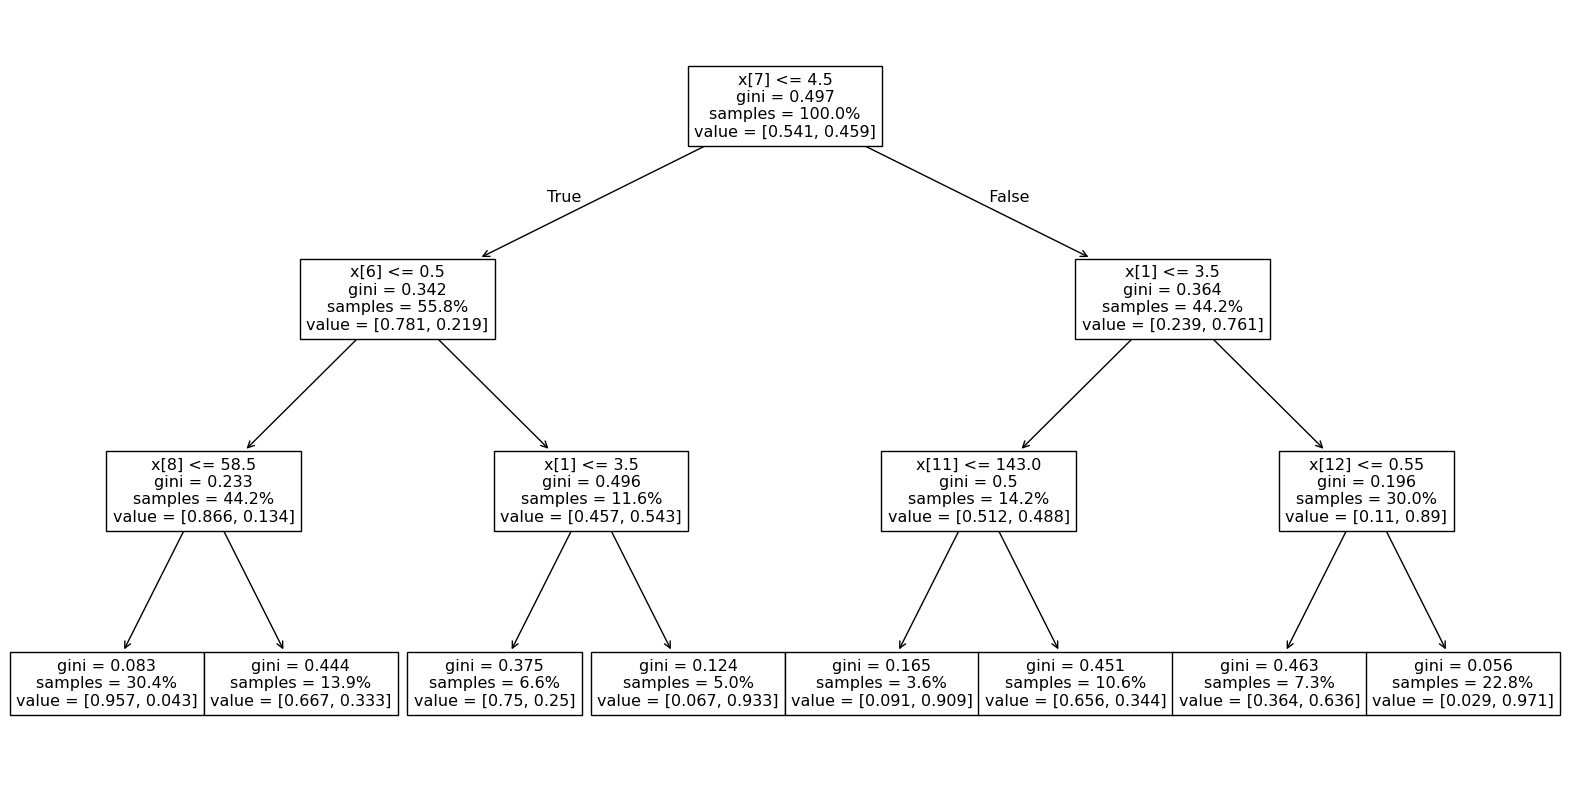

In [72]:

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(final_tree, proportion=True)
plt.show()

In this case, the most relevant feature for this model is Restecg[X7] as it is the root node and splits the data into two main branches, producing the best partition of the data, followed by fbs[X6] and age[X1]. \
\
 restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

## The End! I hope this notebook is useful for your ML projects
### See you next time!
#### Nicolas Sarache